<a href="https://colab.research.google.com/github/LamaCian/Classification-of-Cardiac-Arrhythmias-Patients-/blob/main/Projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Ucitavanje neophodnih biblioteka i skupa podataka





In [5]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import svm
from sklearn import multiclass
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import RFECV


from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from mlxtend.data import mnist_data
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold
from sklearn.metrics import recall_score, roc_auc_score
from sklearn import datasets
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import metrics

import imblearn

In [6]:
seed_value = 7
import tensorflow as tf
from tensorflow import keras
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

import random
random.seed(seed_value)

np.random.seed(seed_value)

tf.random.set_seed(seed_value)

import tensorflow.keras.backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [7]:
data = pd.read_csv('dataset_5_arrhythmia.csv')
data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


## Analiza skupa


In [8]:
categorical = [atribut for atribut in data.columns if data[atribut].dtype=='O']

print('Ukupno ima {} kategorickih atributa\n'.format(len(categorical)))

print('Kategoricki atributi :', categorical)

Ukupno ima 5 kategorickih atributa

Kategoricki atributi : ['T', 'P', 'QRST', 'J', 'heartrate']


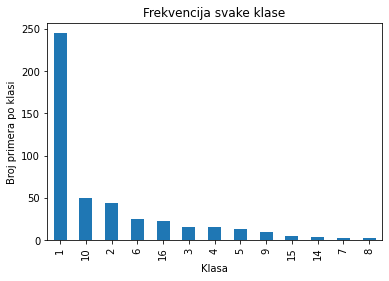

In [9]:
data['class'].value_counts().plot.bar()
plt.title('Frekvencija svake klase')
plt.ylabel('Broj primera po klasi')
plt.xlabel('Klasa')
plt.show()

In [10]:
for cat_feature in categorical:
    print("Atribut ", cat_feature)
    print('\n')
    print(data[cat_feature])
    print('\n')

Atribut  T


0       13
1       37
2       34
3       11
4       13
      ... 
447      4
448     66
449    -19
450     29
451     79
Name: T, Length: 452, dtype: object


Atribut  P


0       64
1      -17
2       70
3       -5
4       61
      ... 
447     40
448     52
449    -61
450    -22
451     52
Name: P, Length: 452, dtype: object


Atribut  QRST


0       -2
1       31
2       66
3       20
4        3
      ... 
447    -27
448     79
449    -70
450     43
451     47
Name: QRST, Length: 452, dtype: object


Atribut  J


0        ?
1        ?
2       23
3        ?
4        ?
      ... 
447      ?
448      ?
449     84
450    103
451      ?
Name: J, Length: 452, dtype: object


Atribut  heartrate


0      63
1      53
2      75
3      71
4       ?
       ..
447    63
448    73
449    84
450    80
451    75
Name: heartrate, Length: 452, dtype: object




In [11]:
data.replace("?", np.NaN, inplace = True)
data.drop(labels = "J", inplace = True, axis = 1)
categorical.remove('J')

In [12]:
for feature in categorical:
  data[feature] = data[feature].astype(float)
  data[feature].replace(np.NaN, data[feature].mean(), inplace=True)

In [13]:
corr_matrix = data.corr()
corr_matrix

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
age,1.000000,-0.059042,-0.109458,0.381555,-0.004032,0.041149,0.195691,0.025654,0.099755,-0.265868,...,0.164816,-0.158009,0.082376,0.090413,NaN,-0.037877,-0.271504,0.018043,-0.199728,-0.092381
sex,-0.059042,1.000000,-0.124685,-0.248104,-0.337101,-0.046771,0.072052,-0.184736,-0.081051,0.069434,...,0.230938,-0.042638,0.092879,0.027401,NaN,0.014210,0.065684,0.031688,0.046605,-0.178080
height,-0.109458,-0.124685,1.000000,-0.074957,-0.006329,0.013601,-0.237314,-0.038411,0.029025,0.061539,...,-0.018876,-0.073439,-0.091361,-0.002545,NaN,0.067670,-0.008471,-0.090370,-0.092235,0.006648
weight,0.381555,-0.248104,-0.074957,1.000000,0.100094,0.119826,0.118657,0.149987,0.120668,-0.173355,...,0.050471,-0.026926,0.051946,0.047448,NaN,-0.046278,-0.144721,0.062285,-0.050682,-0.090151
QRSduration,-0.004032,-0.337101,-0.006329,0.100094,1.000000,0.021831,0.218681,0.397435,0.049682,-0.146043,...,-0.198941,0.091384,-0.228688,-0.013697,NaN,-0.065596,-0.222170,0.129796,-0.082791,0.323879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chV6_PwaveAmp,-0.037877,0.014210,0.067670,-0.046278,-0.065596,0.143272,-0.034971,0.049175,0.248092,0.082009,...,-0.085446,-0.008013,-0.092069,-0.019946,NaN,1.000000,-0.043307,-0.069852,-0.064171,-0.086427
chV6_TwaveAmp,-0.271504,0.065684,-0.008471,-0.144721,-0.222170,0.061160,-0.038884,-0.184846,0.016054,0.063300,...,0.116959,0.093749,-0.072408,-0.017690,NaN,-0.043307,1.000000,-0.124004,0.687877,-0.030798
chV6_QRSA,0.018043,0.031688,-0.090370,0.062285,0.129796,-0.027691,0.256200,0.130202,-0.016365,0.297780,...,0.002630,0.671383,0.562825,-0.051131,NaN,-0.069852,-0.124004,1.000000,0.611219,0.003476
chV6_QRSTA,-0.199728,0.046605,-0.092235,-0.050682,-0.082791,0.021048,0.150979,-0.014430,0.004283,0.255203,...,0.082538,0.560374,0.341484,-0.049667,NaN,-0.064171,0.687877,0.611219,1.000000,-0.009275


In [ ]:
high_cor_col_idx_raw

In [14]:
treshold = 0.85
target = 'class'
corr_matrix = corr_matrix.abs()

high_cor_xy = set([tuple(sorted(x)) for x in np.argwhere(corr_matrix.values>=treshold) if x[0]!=x[1]])
high_cor_col_idx_raw = [(corr_matrix.columns[x[0]], corr_matrix.columns[x[1]]) for x in high_cor_xy]
high_cor_col_idx = [t for t in high_cor_col_idx_raw if target not in t]
target_corr_dict = corr_matrix[target_col].to_dict()
cols_to_drop = [sorted(list(t), key=target_corr_dict.get)[::-1][0] for t in high_cor_col_idx]

df = data.drop(cols_to_drop, axis=1)
df

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_PwaveAmp,chV5_QRSA,chV6_JJwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_SPwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.9,25.5,-0.3,9.0,-0.9,0.0,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.4,21.6,-0.5,8.5,0.0,0.0,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.4,11.5,0.9,9.5,-2.4,0.0,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.6,36.8,0.1,12.2,-2.2,0.0,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.2,21.7,-0.4,13.1,-3.6,0.0,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.8,-8.4,0.0,4.3,-5.0,0.0,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.4,50.7,-0.5,15.6,-1.6,0.0,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,1.9,-39.6,1.2,16.3,-28.6,0.0,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,0.4,29.7,0.2,12.0,-0.7,0.0,2.4,25.0,46.6,1


In [15]:
new_data = df.drop(df.columns[df.apply(lambda col: (col.isin([0]).sum() )> 0.95 * (len(col)))], axis=1)
new_data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_SwaveAmp,chV5_PwaveAmp,chV5_QRSA,chV6_JJwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,-4.0,0.9,25.5,-0.3,9.0,-0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,-2.4,0.4,21.6,-0.5,8.5,0.0,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,-3.4,0.4,11.5,0.9,9.5,-2.4,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,-3.7,0.6,36.8,0.1,12.2,-2.2,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,-0.9,-0.2,21.7,-0.4,13.1,-3.6,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-8.3,0.8,-8.4,0.0,4.3,-5.0,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,-2.8,0.4,50.7,-0.5,15.6,-1.6,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,-30.8,1.9,-39.6,1.2,16.3,-28.6,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-3.5,0.4,29.7,0.2,12.0,-0.7,2.4,25.0,46.6,1


In [16]:
x = new_data.drop(labels='class', axis = 1)
y = new_data['class']

In [17]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x,y, test_size=0.2, stratify=y, random_state=7)

In [18]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, stratify=y_train_validation, random_state=7, test_size=0.2)

In [ ]:
rf = RandomForestClassifier(max_depth= 12, n_estimators= 50, random_state= 13)
rf.fit(x_train_validation, y_train_validation)

In [ ]:
!pip install shap

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x)

class_names = y_train_validation.unique()

shap.summary_plot(shap_values, x_train_validation, plot_type="bar", class_names=class_names)

In [ ]:
x_train_validation_selected_rf = x_train_validation[['heartrate', 'chDI_TwaveAmp','chV1_TwaveAmp', 'chV6_TwaveAmp', 'QRSduration', 'chV1_RPwave', 'chV1_QRSA', 'chDII_TwaveAmp', 'chV6_QRSTA','chAVR_QRSTA', 'chV5_JJwaveAmp','chV1_intrinsicReflecttions', 'chV4_TwaveAmp', 'chAVF_QwaveAmp', 'chV3_JJwaveAmp', 'chV3_QRSTA', 'chV3_QRSTA','chAVR_Rwave','chV3_RwaveAmp', 'chV3_QwaveAmp', 'chV2_Swave'


## Spajanje

In [26]:
values = [7,8,14,15]
for value in values:
  new_data['class'].mask(new_data['class'] == value, 16 , inplace=True)

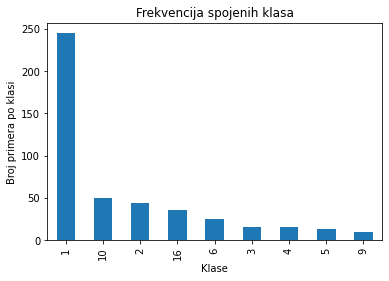

In [27]:
new_data['class'].value_counts().plot.bar()
plt.title('Frekvencija spojenih klasa')
plt.xlabel('Klase')
plt.ylabel('Broj primera po klasi')
plt.show()

In [98]:
x = new_data.drop(labels = 'class', axis = 1)
y = new_data['class']

In [99]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x,y, test_size=0.2, stratify=y, random_state=7)
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, stratify=y_train_validation, random_state=7, test_size=0.2)

## RFE

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l2"))),
  ('classification', RandomForestClassifier())
])
clf.fit(x_train_validation, y_train_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('feature_selection', SelectFromModel(estimator=LinearSVC())),
                ('classification', RandomForestClassifier())])

In [25]:
from sklearn.feature_selection import RFECV


estimator = SVC(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(x_train_validation, y_train_validation)
selector.support_
x


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV5_QwaveAmp,chV5_SwaveAmp,chV5_PwaveAmp,chV5_QRSA,chV6_JJwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,-4.0,0.9,25.5,-0.3,9.0,-0.9,2.9,23.3,49.4
1,56,1,165,64,81,174,401,149,39,25,...,0.0,-2.4,0.4,21.6,-0.5,8.5,0.0,2.1,20.4,38.8
2,54,0,172,95,138,163,386,185,102,96,...,0.0,-3.4,0.4,11.5,0.9,9.5,-2.4,3.4,12.3,49.0
3,55,0,175,94,100,202,380,179,143,28,...,0.0,-3.7,0.6,36.8,0.1,12.2,-2.2,2.6,34.6,61.6
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,-0.9,-0.2,21.7,-0.4,13.1,-3.6,3.9,25.4,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,-8.3,0.8,-8.4,0.0,4.3,-5.0,0.6,-4.4,-0.5
448,37,0,190,85,100,137,361,201,73,86,...,0.0,-2.8,0.4,50.7,-0.5,15.6,-1.6,2.4,38.0,62.4
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,-30.8,1.9,-39.6,1.2,16.3,-28.6,1.0,-44.2,-33.2
450,32,1,155,55,93,106,386,218,63,54,...,0.0,-3.5,0.4,29.7,0.2,12.0,-0.7,2.4,25.0,46.6


In [ ]:
feature_names = x.columns
feature_names

In [ ]:
keep_features = feature_names[selector.support_]
keep_features

print('Broj ostavljenih atributa: ', len(keep_features))

In [ ]:
x_selected_train_validation_rfe = selector.transform(x_train_validation)
x_selected_test_rfe = selector.transform(x_test)

In [ ]:
x_selected_train_validation_rfe

## Logisticka regresija

In [ ]:
model = LogisticRegression(multi_class='multinomial', max_iter = 4000)
pipe_log_simple = Pipeline([('std', StandardScaler()),('clf1', model)])
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-4, 4)),
                'clf1__solver': ['saga', 'newton-cg']}]

grid = GridSearchCV(estimator = pipe_log_simple, param_grid = param_grid1, scoring = 'f1_macro', cv = 5)
grid.fit(x_train_validation, y_train_validation)

In [ ]:
grid.best_params_

In [ ]:
classifier = grid.best_estimator_.named_steps['clf1']

plt.figure(figsize=(20, 15))
plt.bar(feature_names, classifier.coef_[0])
plt.xticks(np.arange(len(feature_names)), rotation='vertical')
plt.title('Koeficijenti logisticke regresije')
plt.show()

In [ ]:
# Select from model
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
model = LogisticRegression(multi_class='multinomial', max_iter = 4000)
pipe_log_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('clf1', model)])
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-4, 4)),
                'clf1__solver': ['saga', 'newton-cg']}]

grid_sfm = GridSearchCV(estimator = pipe_log_sfm, param_grid = param_grid1, scoring = 'f1_macro', cv = 5)
grid_sfm.fit(x_train_validation, y_train_validation)

best_model_sfm = grid_sfm.best_estimator_

train_f1_sfm = f1_score(y_true=y_train, y_pred=best_model_sfm.predict(x_train), average = 'macro')
test_f1_sfm = f1_score(y_true=y_test, y_pred=best_model_sfm.predict(x_test),average = 'macro')

print('Accuracy %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_sfm.best_score_))
print('Best Parameters: %s' % grid_sfm.best_params_)

print('Training Accuracy: %.2f%%' % (100 * train_f1_sfm))
print('Test Accuracy: %.2f%%' % (100 * test_f1_sfm))


In [ ]:
grid.best_params_

In [ ]:
# RFECV
pipe_log_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('clf1', model)])
grid = GridSearchCV(estimator = pipe_log_rfecv, param_grid = param_grid1, scoring = 'f1_macro', cv = 5)
grid.fit(x_train_validation, y_train_validation)


In [ ]:
from sklearn.metrics import f1_score
best_model = grid.best_estimator_

train_acc = f1_score(y_true=y_train, y_pred=best_model.predict(x_train), average = 'macro')
test_acc = f1_score(y_true=y_test, y_pred=best_model.predict(x_test),average = 'macro')

print('Accuracy %.2f%% (average over k-fold CV test folds)' %
      (100 * grid.best_score_))
print('Best Parameters: %s' % grid.best_params_)

print('Training Accuracy: %.2f%%' % (100 * train_acc))
print('Test Accuracy: %.2f%%' % (100 * test_acc))

In [ ]:
# Select from model tree based algorithm



pipe_log_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('clf1', model)])
param_grid1 = [{'clf1__penalty': ['l2'],
                'clf1__C': np.power(10., np.arange(-4, 4)),
                'clf1__solver': ['saga', 'sag','newton-cg']}]

grid_sfm_tree = GridSearchCV(estimator = pipe_log_sfm_tree, param_grid = param_grid1, scoring = 'f1_macro', cv = 5)
grid_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_sfm_tree = grid_sfm_tree.best_estimator_

train_f1_sfm_tree = f1_score(y_true=y_train, y_pred=best_model_sfm_tree.predict(x_train), average = 'macro')
test_f1_sfm_tree = f1_score(y_true=y_test, y_pred=best_model_sfm_tree.predict(x_test),average = 'macro')

print('Accuracy %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_sfm_tree.best_score_))
print('Best Parameters: %s' % grid_sfm_tree.best_params_)

print('Training Accuracy: %.2f%%' % (100 * train_f1_sfm_tree))
print('Test Accuracy: %.2f%%' % (100 * test_f1_sfm_tree))


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_log_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('clf1', model)])
grid_smote = GridSearchCV(estimator = pipe_log_smote, param_grid = param_grid1, scoring = 'f1_macro', cv = 5)
grid_smote.fit(x_train_validation, y_train_validation)

best_model_smote = grid_smote.best_estimator_

train_f1 = f1_score(y_true=y_train, y_pred=best_model_smote.predict(x_train), average = 'macro')
test_f1 = f1_score(y_true=y_test, y_pred=best_model_smote.predict(x_test),average = 'macro')

print('f1 score %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_smote.best_score_))
print('Best Parameters: %s' % grid_smote.best_params_)

print('Training f1 score: %.2f%%' % (100 * train_acc))
print('Test f1 score: %.2f%%' % (100 * test_acc))

## KNN

In [ ]:
model_knn = KNeighborsClassifier()
param_grid2 = [{'knn__n_neighbors': list(range(2, 5)),
                'knn__p': [1, 2],
                'knn__weights' : ['uniform', 'distance'],
                }]
pipe_knn_simple = Pipeline([('std', StandardScaler()),('knn', model_knn)])
grid_knn = GridSearchCV(estimator = pipe_knn_simple, param_grid = param_grid2, scoring = 'f1_macro', cv = 5)
grid_knn.fit(x_train_validation, y_train_validation)


best_model_knn = grid_knn.best_estimator_

train_f1_knn = f1_score(y_true=y_train, y_pred=best_model_knn.predict(x_train), average = 'macro')
test_f1_knn = f1_score(y_true=y_test, y_pred=best_model_knn.predict(x_test),average = 'macro')

print('F1 %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_knn.best_score_))
print('Best Parameters: %s' % grid_knn.best_params_)

print('Training F1: %.2f%%' % (100 * train_f1_knn))
print('Test F1: %.2f%%' % (100 * test_f1_knn))


train_recall  = recall_score(y_train, best_model_knn.predict(x_train), average = 'weighted')
test_recall  = recall_score(y_test, best_model_knn.predict(x_test), average = 'weighted')
print('Training recall score: %.2f%%' % (100 * train_recall))
print('Test recall score: %.2f%%' % (100 * test_recall))

In [ ]:
# Select from model

pipe_knn_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('knn', model_knn)])


grid_sfm_knn = GridSearchCV(estimator = pipe_knn_sfm, param_grid = param_grid2, scoring = 'f1_macro', cv = 5)
grid_sfm_knn.fit(x_train_validation, y_train_validation)

best_model_sfm_knn = grid_sfm_knn.best_estimator_

train_f1_sfm = f1_score(y_true=y_train, y_pred=best_model_sfm_knn.predict(x_train), average = 'macro')
test_f1_sfm = f1_score(y_true=y_test, y_pred=best_model_sfm_knn.predict(x_test),average = 'macro')

print('F1 %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_sfm_knn.best_score_))
print('Best Parameters: %s' % grid_sfm_knn.best_params_)

print('Training F1: %.2f%%' % (100 * train_f1_sfm))
print('Test F1: %.2f%%' % (100 * test_f1_sfm))

train_recall  = recall_score(y_train, best_model_sfm_knn.predict(x_train), average = 'weighted')
test_recall  = recall_score(y_test, best_model_sfm_knn.predict(x_test), average = 'weighted')
print('Training recall score: %.2f%%' % (100 * train_recall))
print('Test recall score: %.2f%%' % (100 * test_recall))


In [ ]:
# RFECV
pipe_knn_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('knn', model_knn)])
grid_rfecv_knn = GridSearchCV(estimator = pipe_knn_rfecv, param_grid = param_grid2, scoring = 'f1_macro', cv = 5)
grid_rfecv_knn.fit(x_train_validation, y_train_validation)

from sklearn.metrics import f1_score
best_model_knn_rfecv = grid_rfecv_knn.best_estimator_

train_acc = f1_score(y_true=y_train, y_pred=best_model_knn_rfecv.predict(x_train), average = 'macro')
test_acc = f1_score(y_true=y_test, y_pred=best_model_knn_rfecv.predict(x_test),average = 'macro')

print('F1 %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_rfecv_knn.best_score_))
print('Best Parameters: %s' % grid_rfecv_knn.best_params_)

print('Training F1: %.2f%%' % (100 * train_f1_sfm))
print('Test F1: %.2f%%' % (100 * test_f1_sfm))

train_recall  = recall_score(y_train, best_model_knn_rfecv.predict(x_train), average = 'weighted')
test_recall  = recall_score(y_test, best_model_knn_rfecv.predict(x_test), average = 'weighted')
print('Training recall score: %.2f%%' % (100 * train_recall))
print('Test recall score: %.2f%%' % (100 * test_recall))


In [ ]:
# Select from model tree based algorithm

pipe_knn_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('knn', model_knn)])


grid_knn_sfm_tree = GridSearchCV(estimator = pipe_knn_sfm_tree, param_grid = param_grid2, scoring = 'f1_macro', cv = 5)
grid_knn_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_knn_sfm_tree = grid_knn_sfm_tree.best_estimator_

train_f1_sfm_tree = f1_score(y_true=y_train, y_pred=best_model_knn_sfm_tree.predict(x_train), average = 'macro')
test_f1_sfm_tree = f1_score(y_true=y_test, y_pred=best_model_knn_sfm_tree.predict(x_test),average = 'macro')

print('F1 %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_knn_sfm_tree.best_score_))
print('Best Parameters: %s' % grid_knn_sfm_tree.best_params_)

print('Training F1: %.2f%%' % (100 * train_f1_sfm))
print('Test F1: %.2f%%' % (100 * test_f1_sfm))

train_recall  = recall_score(y_train, best_model_knn_sfm_tree.predict(x_train), average = 'weighted')
test_recall  = recall_score(y_test, best_model_knn_sfm_tree.predict(x_test), average = 'weighted')
print('Training recall score: %.2f%%' % (100 * train_recall))
print('Test recall score: %.2f%%' % (100 * test_recall))


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_knn_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('knn', model_knn)])
grid_knn_smote = GridSearchCV(estimator = pipe_knn_smote, param_grid = param_grid2, scoring = 'f1_macro', cv = 5)
grid_knn_smote.fit(x_train_validation, y_train_validation)

best_model_knn_smote = grid_knn_smote.best_estimator_

train_f1 = f1_score(y_true=y_train, y_pred=best_model_knn_smote.predict(x_train), average = 'macro')
test_f1 = f1_score(y_true=y_test, y_pred=best_model_knn_smote.predict(x_test),average = 'macro')

print('F1 %.2f%% (average over k-fold CV test folds)' %
      (100 * grid_knn_smote.best_score_))
print('Best Parameters: %s' % grid_knn_smote.best_params_)

print('Training F1: %.2f%%' % (100 * train_f1_sfm))
print('Test F1: %.2f%%' % (100 * test_f1_sfm))

train_recall  = recall_score(y_train, best_model_knn_smote.predict(x_train), average = 'weighted')
test_recall  = recall_score(y_test, best_model_knn_smote.predict(x_test), average = 'weighted')
print('Training recall score: %.2f%%' % (100 * train_recall))
print('Test recall score: %.2f%%' % (100 * test_recall))

In [ ]:
calculate_metrics(best_model_knn_smote, y_test, best_model_knn_smote.predict(x_test), grid_knn_smote)

In [30]:
def calculate_metrics(model, y_train, y_test, grid):

  print('Izracunate metrike: ')
  print('\n')

  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)


  train_f1= f1_score(y_train, y_pred_train, average = 'macro')
  test_f1= f1_score(y_test, y_pred_test,average = 'macro')
  train_recall  = recall_score(y_train, y_pred_train, average = 'macro')
  test_recall = recall_score(y_test, y_pred_test, average = 'macro')
  train_precision  = precision_score(y_train, y_pred_train, average = 'macro')
  test_precision = precision_score(y_test, y_pred_test, average = 'macro')

  print('F1 %.2f%% (average over k-fold CV test folds)' %
      (100 * grid.best_score_))
  print('Best Parameters: %s' % grid.best_params_)
  print(100 * '-')
  print('Macro: ')

  print('Training F1: %.2f%%' % (100 * train_f1))
  print('Test F1: %.2f%%' % (100 * test_f1))
  print('\n')

  print('Training recall score: %.2f%%' % (100 * train_recall))
  print('Test recall score: %.2f%%' % (100 * test_recall))
  print('\n')

  print('Training precision score: %.2f%%' % (100 * train_precision))
  print('Test precision score: %.2f%%' % (100 * test_precision))

  print(100 * '-')
  print('\n')
  print('Weighted: ')
  train_f1_weighted= f1_score(y_train, y_pred_train, average = 'weighted')
  test_f1_weighted= f1_score(y_test, y_pred_test,average = 'weighted')
  print('Training F1: %.2f%%' % (100 * train_f1_weighted))
  print('Test F1: %.2f%%' % (100 * test_f1_weighted))
  train_recall_weighted  = recall_score(y_train,y_pred_train, average = 'weighted')
  test_recall_weighted  = recall_score(y_test, y_pred_test, average = 'weighted')
  print('Training recall score: %.2f%%' % (100 * train_recall_weighted))
  print('Test recall score: %.2f%%' % (100 * test_recall_weighted))
  print('\n')
  train_precision_weighted   = precision_score(y_train, y_pred_train, average = 'weighted')
  test_precision_weighted  = precision_score(y_test, y_pred_test, average = 'weighted')
  print('Training precision score: %.2f%%' % (100 * train_precision_weighted ))
  print('Test precision score: %.2f%%' % (100 * test_precision_weighted ))

  print(100 * '-')

  cnf_matrix = confusion_matrix(y_test, y_pred_test)
  print('\n')
  print('Matrica konfuzije test: ')
  print('\n')
  print(pd.DataFrame(cnf_matrix,index=model.classes_, columns=model.classes_))
  print(100 * '-')
  print('\n')


  cnf_matrix = confusion_matrix(y_train, y_pred_train)
  print('\n')
  print('Matrica konfuzije trening: ')
  print('\n')
  print(pd.DataFrame(cnf_matrix,index=model.classes_, columns=model.classes_))
  print(100 * '-')
  print('\n')

  FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
  FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
  TP = np.diag(cnf_matrix)
  TN = cnf_matrix.sum() - (FP + FN + TP)

  FP = FP.astype(float)
  FN = FN.astype(float)
  TP = TP.astype(float)
  TN = TN.astype(float)

  # Sensitivity, hit rate, recall, or true positive rate
  TPR = TP/(TP+FN)
  print('Sensitivity ', TPR)
  # Specificity or true negative rate
  TNR = TN/(TN+FP) 
  print('Specificity : ', TNR)
  print('\n')
  print(100 * '-')

  print('\n')
  print("Izvestaj klasifikacije Trening")
  print(metrics.classification_report(y_train, y_pred_train))
  print('\n')
  print("Izvestaj klasifikacije Test")
  print(metrics.classification_report(y_test, y_pred_test))

  f1_scores = [train_f1, test_f1,train_f1_weighted, test_f1_weighted]
  f1_labels = ['macro F1 train', 'macro F1 test', 'weighted F1 train','weighted F1 test']

  sns.barplot(x =f1_labels, y = f1_scores)
  plt.title('F1 score')
  plt.ylabel('score')
  plt.xticks(rotation='vertical')
  plt.show()

  recall_scores = [train_recall, test_recall,train_recall_weighted, test_f1_weighted]
  recall_labels = ['macro recall train', 'macro recall test', 'weighted recall train','weighted recall test',]


  sns.barplot(x =recall_labels, y = recall_scores)
  plt.title('Recall score')
  plt.ylabel('score')
  plt.xticks(rotation='vertical')
  plt.show()

  precision_scores = [train_precision, test_precision,train_precision_weighted, test_precision_weighted]
  precision_labels = ['macro precision train', 'macro precision test', 'weighted precision train','weighted precision test',]


  sns.barplot(x = precision_labels, y = precision_scores)
  plt.title('Precision score')
  plt.ylabel('score')
  plt.xticks(rotation='vertical')
  plt.show()

  return train_f1, test_f1, train_recall, test_recall, train_precision, test_precision, train_f1_weighted, test_f1_weighted, train_recall_weighted,test_recall_weighted, train_precision, test_precision, TNR



## Random forest

In [ ]:
#Simple
model_rf = RandomForestClassifier()
param_grid3 = [{'rf__n_estimators': [10, 50, 100, 200, 500, 1000],
                'rf__criterion': ['gini', 'entropy'],
                'rf__class_weight' : ['balanced', 'balanced_subsample']
                }]
pipe_rf_simple = Pipeline([('std', StandardScaler()),('rf', model_rf)])
grid_rf = GridSearchCV(estimator = pipe_rf_simple, param_grid = param_grid3, scoring = 'f1_macro', cv = 5)
grid_rf.fit(x_train_validation, y_train_validation)


best_model_rf= grid_rf.best_estimator_

calculate_metrics(best_model_rf, y_test, best_model_rf.predict(x_test), grid_rf)


In [ ]:
# Select from model

pipe_rf_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('rf', model_rf)])


grid_sfm_rf = GridSearchCV(estimator = pipe_rf_sfm, param_grid = param_grid3, scoring = 'f1_macro', cv = 5)
grid_sfm_rf.fit(x_train_validation, y_train_validation)

best_model_sfm_rf = grid_sfm_rf.best_estimator_
calculate_metrics(best_model_sfm_rf, y_test, best_model_sfm_rf.predict(x_test), grid_sfm_rf)


# train_f1_sfm_rf = f1_score(y_true=y_train, y_pred=best_model_sfm_rf.predict(x_train), average = 'macro')
# test_f1_sfm_rf = f1_score(y_true=y_test, y_pred=best_model_sfm_rf.predict(x_test),average = 'macro')

# print('F1 %.2f%% (average over k-fold CV test folds)' %
#       (100 * grid_sfm_rf.best_score_))
# print('Best Parameters: %s' % grid_sfm_rf.best_params_)

# print('Training F1: %.2f%%' % (100 * train_f1_sfm_rf))
# print('Test F1: %.2f%%' % (100 * test_f1_sfm_rf))

# train_recall  = recall_score(y_train, best_model_sfm_rf.predict(x_train), average = 'weighted')
# test_recall  = recall_score(y_test, best_model_sfm_rf.predict(x_test), average = 'weighted')
# print('Training recall score: %.2f%%' % (100 * train_recall))
# print('Test recall score: %.2f%%' % (100 * test_recall))


In [ ]:
# RFECV
pipe_rf_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('rf', model_rf)])
grid_rfecv_rf = GridSearchCV(estimator = pipe_knn_rfecv, param_grid = param_grid3, scoring = 'f1_macro', cv = 5)
grid_rfecv_rf.fit(x_train_validation, y_train_validation)

from sklearn.metrics import f1_score
best_model_rf_rfecv = grid_rfecv_rf.best_estimator_

calculate_metrics(best_model_rf_rfecv, y_test, best_model_rf_rfecv.predict(x_test), grid_rfecv_rf)



In [ ]:
# Select from model tree based algorithm

pipe_rf_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('rf', model_rf)])


grid_rf_sfm_tree = GridSearchCV(estimator = pipe_rf_sfm_tree, param_grid = param_grid2, scoring = 'f1_macro', cv = 5)
grid_rf_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_rf_sfm_tree = grid_rf_sfm_tree.best_estimator_
calculate_metrics(best_model_rf_sfm_tree, y_test, best_model_rf_sfm_tree.predict(x_test), grid_rf_sfm_tree)



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_rf_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('rf', model_rf)])
grid_rf_smote = GridSearchCV(estimator = pipe_rf_smote, param_grid = param_grid2, scoring = 'f1_macro', cv = 5)
grid_rf_smote.fit(x_train_validation, y_train_validation)

best_model_rf_smote = grid_rf_smote.best_estimator_

calculate_metrics(best_model_rf_smote, y_test, best_model_rf_smote.predict(x_test), grid_rf_smote)




## Stabla odlucivanja

In [ ]:
model_tree = DecisionTreeClassifier()
param_grid4 = [{'tree__max_depth': list(range(1, 10)),
                'tree__criterion': ['gini', 'entropy'],
                'tree__splitter' : ['best', 'random'],
                'tree__class_weight' : ['balanced']
                }]

pipe_tree_simple = Pipeline([('std', StandardScaler()),('tree', model_tree)])
grid_tree = GridSearchCV(estimator = pipe_tree_simple, param_grid = param_grid4, scoring = 'f1_macro', cv = 5)
grid_tree.fit(x_train_validation, y_train_validation)


best_model_tree= grid_tree.best_estimator_

train_f1_tree, test_f1_tree, train_recall_tree, test_recall_tree, train_precision_tree, test_precision_tree, train_f1_weighted_tree, test_f1_weighted_tree, train_recall_weighted_tree,test_recall_weighted_tree, train_precision_tree, test_precision_tree, specifity_tree = calculate_metrics(best_model_tree, y_train,y_test,grid_tree)


In [ ]:
plt.figure(figsize=(200, 100))
tree.plot_tree(best_model_tree, feature_names=list(x.columns), fontsize=12, filled=True, rounded=True)
plt.show()

In [ ]:

pipe_tree_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('tree', model_tree)])


grid_sfm_tree = GridSearchCV(estimator = pipe_tree_sfm, param_grid = param_grid4, scoring = 'f1_macro', cv = 5)
grid_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_sfm_tree = grid_sfm_tree.best_estimator_
train_f1_tree_sfm, test_f1_tree_sfm, train_recall_tree_sfm, test_recall_tree_sfm, train_precision_tree_sfm, test_precision_tree_sfm, train_f1_weighted_tree_sfm, test_f1_weighted_tree_sfm, test_recall_weighted_tree_sfm,train_recall_weighted_tree_sfm, train_precision_tree_sfm, test_precision_tree_sfm, specifity_tree_sfm = calculate_metrics(best_model_sfm_tree, y_train, y_test, grid_sfm_tree)



In [ ]:
# RFECV
pipe_tree_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('tree', model_tree)])
grid_rfecv_tree = GridSearchCV(estimator = pipe_tree_rfecv, param_grid = param_grid4, scoring = 'f1_macro', cv = 5)
grid_rfecv_tree.fit(x_train_validation, y_train_validation)

from sklearn.metrics import f1_score
best_model_tree_rfecv = grid_rfecv_tree.best_estimator_

train_f1_tree_rfecv, test_f1_tree_rfecv, train_recall_tree_rfecv, test_recall_tree_rfecv, train_precision_tree_rfecv, test_precision_tree_rfecv, train_f1_weighted_tree_rfecv, test_f1_weighted_tree_rfecv, test_recall_weighted_tree_rfecv,train_recall_weighted_tree_rfecv, train_precision_tree_rfecv, test_precision_tree_rfecv, specifity_tree_rfecv = calculate_metrics(best_model_tree_rfecv, y_train, y_test, grid_rfecv_tree)



In [ ]:
# Select from model tree based algorithm

pipe_tree_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('tree', model_tree)])


grid_rf_sfm_tree = GridSearchCV(estimator = pipe_tree_sfm_tree, param_grid = param_grid4, scoring = 'f1_macro', cv = 5)
grid_rf_sfm_tree.fit(x_train_validation, y_train_validation)

best_model_rf_sfm_tree = grid_rf_sfm_tree.best_estimator_
train_f1_rf_sfm_tree, test_f1_rf_sfm_tree, train_recall_rf_sfm_tree, test_recall_rf_sfm_tree, train_precision_rf_sfm_tree, test_precision_rf_sfm_tree, train_f1_weighted_rf_sfm_tree, test_f1_weighted_rf_sfm_tree, train_recall_weighted_rf_sfm_tree,test_recall_weighted_rf_sfm_tree, train_precision_rf_sfm_tree, test_precision_rf_sfm_tree, specifity_rf_sfm_tree = calculate_metrics(best_model_rf_sfm_tree, y_train, y_test, grid_rf_sfm_tree)



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

pipe_tree_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('tree', model_tree)])
grid_tree_smote = GridSearchCV(estimator = pipe_tree_smote, param_grid = param_grid4, scoring = 'f1_macro', cv = 5)
grid_tree_smote.fit(x_train_validation, y_train_validation)

best_model_tree_smote = grid_tree_smote.best_estimator_

train_f1_tree_smote, test_f1_tree_smote, train_recall_tree_smote, test_recall_tree_smote, train_precision_tree_smote, test_precision_tree_smote, train_f1_weighted_tree_smote, test_f1_weighted_tree_smote, test_recall_weighted_tree_smote,train_recall_weighted_tree_smote, train_precision_tree_smote, test_precision_tree_smote, specifity_tree_smote= calculate_metrics(best_model_tree_smote, y_train, y_test, grid_tree_smote)


In [ ]:
def compare_metrics(score1, score2, score3, score4,name1,name2,name3,name4):
  x = [score1, score2, score3, score4]
  y = [name1,name2,name3,name4]

  sns.barplot(x , y)
  plt.title('Uporedjivanje razlicitih tehnika')
  plt.xlabel('score')
  plt.show()




In [ ]:
compare_metrics(test_f1_rf_sfm_tree,test_f1_tree_rfecv,test_f1_tree_sfm,test_f1_tree, 'Tree based sfm', 'RFECV', 'SFM', 'Basic')

## XGB

## AdaBoost

## SVM

### Linearni SVM 

In [ ]:
from sklearn import multiclass


In [ ]:
from sklearn.metrics import balanced_accuracy_score,roc_auc_score, make_scorer

model_linear_svm = svm.LinearSVC(max_iter = 10000,dual=False)


param_grid_linear_svm = [{'linear_svm__loss': ['hinge', 'squared_hinge'],
                    'linear_svm__class_weight': ['balanced', None],
                    'linear_svm__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

pipe_linear_svm = Pipeline([('std', StandardScaler()),('linear_svm', model_linear_svm)])
grid_linear_svm = GridSearchCV(estimator = pipe_linear_svm, param_grid = param_grid_linear_svm, scoring = 'f1_weighted' , cv = 5 )
grid_linear_svm.fit(x_train_validation, y_train_validation)


best_model_linear_svm = grid_linear_svm.best_estimator_

train_f1_linear_svm , test_f1_linear_svm , train_recall_linear_svm , test_recall_linear_svm, train_precision_linear_svm , test_precision_linear_svm , train_f1_weighted_linear_svm , test_f1_weighted_linear_svm , train_recall_weighted_linear_svm, test_recall_weighted_linear_svm, train_precision_linear_svm, test_precision_linear_svm, specifity_linear_svm = calculate_metrics(best_model_linear_svm, y_train,y_test,grid_linear_svm)


In [ ]:
`param_grid_OVR = [{'OvR__'}]
param_grid_OVR = [{'clf4__kernel': ['rbf'],
                'clf4__C': np.power(10., np.arange(-4, 4)),
                'clf4__gamma': np.power(10., np.arange(-5, 0))},
               

               {'clf4__kernel': ['linear'],
                'clf4__C': np.power(10., np.arange(-4, 4))}]

In [ ]:
Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gammas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

model = svm.SVC(kernel='rbf', gamma=gamma, C=C)


In [ ]:

model_linear_svm = svm.LinearSVC(max_iter = 10000)
pipe_linear_svm_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('linear_svm', model_linear_svm)])

grid_linear_svm_sfm = GridSearchCV(estimator = pipe_linear_svm_sfm, param_grid = param_grid_linear_svm, scoring = 'f1_weighted' , cv = 5 )
grid_linear_svm_sfm.fit(x_train_validation, y_train_validation)


best_model_linear_svm_sfm = grid_linear_svm_sfm.best_estimator_

train_f1_linear_svm_sfm , test_f1_linear_svm_sfm , train_recall_linear_svm_sfm , test_recall_linear_svm_sfm, train_precision_linear_svm_sfm, test_precision_linear_svm_sfm, train_f1_weighted_linear_svm_sfm , test_f1_weighted_linear_svm_sfm , train_recall_weighted_linear_svm_sfm, test_recall_weighted_linear_svm_sfm, train_precision_linear_svm_sfm, test_precision_linear_svm_sfm, specifity_linear_svm_sfm = calculate_metrics(best_model_linear_svm_sfm, y_train,y_test,grid_linear_svm_sfm)


In [ ]:
pipe_svm_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('linear_svm', model_linear_svm)])

grid_linear_svm_rfecv  = GridSearchCV(estimator = pipe_svm_rfecv, param_grid = param_grid_linear_svm, scoring = 'f1_weighted' , cv = 5 )
grid_linear_svm_rfecv.fit(x_train_validation, y_train_validation)


best_model_linear_svm_rfecv = grid_linear_svm_rfecv.best_estimator_

train_f1_linear_svm_rfecv, test_f1_linear_svm_rfecv , train_recall_linear_svm_rfecv, test_recall_linear_svm_rfecv, train_precision_linear_svm_rfecv, test_precision_linear_svm_rfecv, train_f1_weighted_linear_svm_rfecv , test_f1_weighted_linear_svm_rfecv , train_recall_weighted_linear_svm_rfecv, test_recall_weighted_linear_svm_rfecv, train_precision_linear_svm_rfecv, test_precision_linear_svm_rfecv, specifity_linear_svm_rfecv = calculate_metrics(best_model_linear_svm_rfecv, y_train,y_test,grid_linear_svm_rfecv)



In [ ]:
pipe_svm_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('linear_svm', model_linear_svm)])

grid_linear_svm_sfm_tree = GridSearchCV(estimator = pipe_svm_rfecv, param_grid = param_grid_linear_svm, scoring = 'f1_weighted' , cv = 5 )
grid_linear_svm_sfm_tree.fit(x_train_validation, y_train_validation)


best_model_linear_svm_sfm_tree = grid_linear_svm_sfm_tree.best_estimator_

train_f1_linear_svm_sfm_tree, test_f1_linear_svm_sfm_tree , train_recall_linear_svm_sfm_tree, test_recall_linear_svm_sfm_tree, train_precision_linear_svm_sfm_tree, test_precision_linear_svm_sfm_tree, train_f1_weighted_linear_svm_sfm_tree , test_f1_weighted_linear_svm_sfm_tree , train_recall_weighted_linear_svm_sfm_tree, test_recall_weighted_linear_svm_sfm_tree, train_precision_linear_svm_sfm_tree, test_precision_linear_svm_sfm_tree, specifity_linear_svm_sfm_tree = calculate_metrics(best_model_linear_svm_sfm_tree, y_train,y_test,grid_linear_svm_sfm_tree)




In [ ]:

from imblearn.pipeline import Pipeline, make_pipeline

pipe_linear_svm_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('linear_svm', model_linear_svm)])
grid_linear_svm_smote = GridSearchCV(estimator = pipe_linear_svm_smote, param_grid = param_grid_linear_svm, scoring = 'f1_weighted', cv = 5)
grid_linear_svm_smote.fit(x_train_validation, y_train_validation)

best_model_linear_svm_smote = grid_linear_svm_smote.best_estimator_

train_f1_linear_svm_smote, test_f1_linear_svm_smote, train_recall_linear_svm_smote, test_recall_linear_svm_smote, train_precision_linear_svm_smote, test_precision_linear_svm_smote, train_f1_weighted_linear_svm_smote, test_f1_weighted_linear_svm_smote, test_recall_weighted_linear_svm_smote,train_recall_weighted_linear_svm_smote, train_precision_linear_svm_smote, test_precision_linear_svm_smote, specifity_linear_svm_smote= calculate_metrics(best_model_linear_svm_smote, y_train, y_test, grid_linear_svm_smote)



## SVM - OVO

In [ ]:
# model_linear_OvO = multiclass.OneVsOneClassifier(model_linear_svm)

# param_grid_linear_svm = [{'linear_OvO__loss': ['hinge', 'squared_hinge'],
#                     'linear_OvO__class_weight': ['balanced', None],
#                     'linear_OvO__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}]

# pipe_SVM_OvO_simple = Pipeline([('std', StandardScaler()),('linear_OvO', model_linear_OvO)])
# grid_OvO = GridSearchCV(estimator = pipe_SVM_OvO_simple, param_grid = param_grid_linear_svm, scoring = 'f1_weighted', cv = 5)
# grid_OvO.fit(x_train_validation, y_train_validation)


# best_model__OvO= grid_OvO.best_estimator_

# train_f1_OvO, test_f1_OvO, train_recall_OvO, test_recall_OvO, train_precision_OvO, test_precision_OvO, train_f1_weighted_OvO, test_f1_weighted_OvO, train_recall_weighted_OvO,test_recall_weighted_OvO, train_precision_OvO, test_precision_OvO, specifity_OvO = calculate_metrics(best_model_OvO, y_train,y_test,grid_OvO)


## SVC

Izracunate metrike: 


F1 66.90% (average over k-fold CV test folds)
Best Parameters: {'svc__C': 10.0, 'svc__class_weight': 'balanced', 'svc__decision_function_shape': 'ovr', 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 88.54%
Test F1: 51.54%


Training recall score: 94.51%
Test recall score: 58.15%


Training precision score: 84.29%
Test precision score: 48.79%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 86.70%
Test F1: 58.15%
Training recall score: 86.46%
Test recall score: 57.14%


Training precision score: 88.73%
Test precision score: 61.54%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   29   2   0   1   2   5   0   4   6
2    2   5   0   0   0   1   0   0   

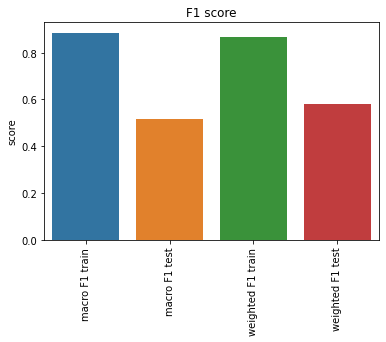

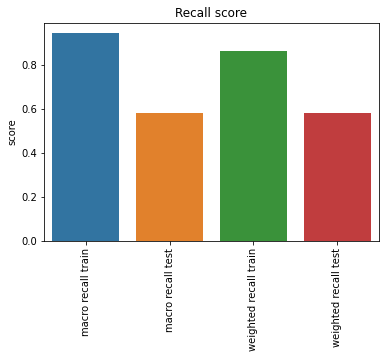

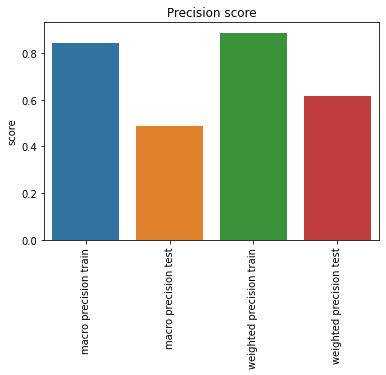

In [31]:
model_svc = svm.SVC()


param_grid_svc = [{'svc__kernel': ['rbf','poly'],
                'svc__C': np.power(10., np.arange(-4, 4)),
                'svc__gamma': np.power(10., np.arange(-5, 5)),
                'svc__class_weight' : ['balanced',None],
                'svc__decision_function_shape' : ['ovr', 'ovo']}]

pipe_svc = Pipeline([('std', StandardScaler()),('svc', model_svc)])
grid_svc= GridSearchCV(estimator = pipe_svc, param_grid = param_grid_svc, scoring = 'f1_weighted' , cv = 5 )
grid_svc.fit(x_train_validation, y_train_validation)


best_model_svc= grid_svc.best_estimator_

train_f1_svc , test_f1_svc , train_recall_svc , test_recall_svc, train_precision_svc , test_precision_svc , train_f1_weighted_svc , test_f1_weighted_svc , train_recall_weighted_svc, test_recall_weighted_svc, train_precision_svc, test_precision_svc, specifity_svc = calculate_metrics(best_model_svc, y_train,y_test,grid_svc)


Izracunate metrike: 


F1 66.12% (average over k-fold CV test folds)
Best Parameters: {'svc__C': 10.0, 'svc__class_weight': 'balanced', 'svc__decision_function_shape': 'ovr', 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
----------------------------------------------------------------------------------------------------
Macro: 
Training F1: 98.33%
Test F1: 55.64%


Training recall score: 99.50%
Test recall score: 61.07%


Training precision score: 97.30%
Test precision score: 57.45%
----------------------------------------------------------------------------------------------------


Weighted: 
Training F1: 97.60%
Test F1: 66.92%
Training recall score: 97.57%
Test recall score: 67.03%


Training precision score: 97.80%
Test precision score: 69.45%
----------------------------------------------------------------------------------------------------


Matrica konfuzije test: 


    1   2   3   4   5   6   9   10  16
1   38   2   0   0   3   1   0   1   4
2    1   7   0   0   0   0   1   0   0

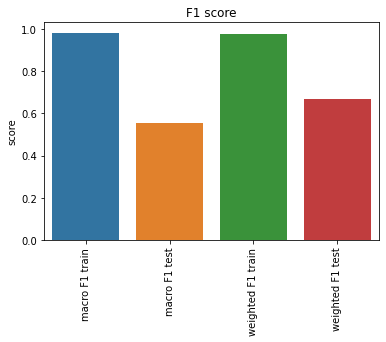

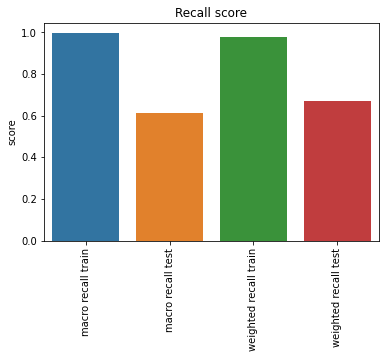

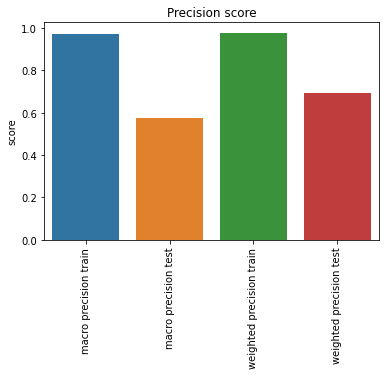

In [32]:

pipe_svc_sfm = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(LinearSVC(penalty="l2",dual=False))),('svc', model_svc)])

grid_svc_sfm = GridSearchCV(estimator = pipe_svc_sfm, param_grid = param_grid_svc, scoring = 'f1_weighted' , cv = 5 )
grid_svc_sfm.fit(x_train_validation, y_train_validation)


best_model_svc_sfm = grid_svc_sfm .best_estimator_

train_f1_svc_sfm  , test_f1_svc_sfm  , train_recall_svc_sfm  , test_recall_svc_sfm , train_precision_svc_sfm  , test_precision_svc_sfm  , train_f1_weighted_svc_sfm  , test_f1_weighted_svc_sfm  , train_recall_weighted_svc_sfm , test_recall_weighted_svc_sfm , train_precision_svc_sfm , test_precision_svc_sfm , specifity_svc_sfm  = calculate_metrics(best_model_svc_sfm , y_train,y_test,grid_svc_sfm )


In [33]:
pipe_svc_rfecv = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('svc', model_svc)])

grid_svc_rfecv= GridSearchCV(estimator = pipe_svc_rfecv, param_grid = param_grid_svc, scoring = 'f1_weighted' , cv = 5 )
grid_svc_rfecv.fit(x_train_validation, y_train_validation)


best_model_svc_rfecv= grid_svc_rfecv.best_estimator_

train_f1_svc_rfecv , test_f1_svc_rfecv , train_recall_svc_rfecv , test_recall_svc_rfecv, train_precision_svc_rfecv , test_precision_svc_rfecv , train_f1_weighted_svc_rfecv , test_f1_weighted_svc_rfecv , train_recall_weighted_svc_rfecv, test_recall_weighted_svc_rfecv, train_precision_svc_rfecv, test_precision_svc_rfecv, specifity_svc_rfecv = calculate_metrics(best_model_svc_rfecv, y_train,y_test,grid_svc_rfecv)


KeyboardInterrupt: ignored

In [34]:
pipe_svc_sfm_tree = Pipeline([('std', StandardScaler()),('feature_selector',SelectFromModel(RandomForestClassifier(max_depth= 12, n_estimators= 50))),('svc', model_svc)])


grid_svc_sfm_tree = GridSearchCV(estimator = pipe_svc_sfm_tree, param_grid = param_grid_svc, scoring = 'f1_weighted' , cv = 5 )
grid_svc_sfm_tree.fit(x_train_validation, y_train_validation)


best_model_svc_sfm_tree = grid_svc_sfm_tree.best_estimator_

train_f1_svc_sfm_tree , test_f1_svc_sfm_tree , train_recall_svc_sfm_tree , test_recall_svc_sfm_tree, train_precision_svc_sfm_tree , test_precision_svc_sfm_tree , train_f1_weighted_svc_sfm_tree , test_f1_weighted_svc_sfm_tree , train_recall_weighted_svc_sfm_tree, test_recall_weighted_svc_sfm_tree, train_precision_svc_sfm_tree, test_precision_svc_sfm_tree, specifity_svc_sfm_tree = calculate_metrics(best_model_svc_sfm_tree, y_train,y_test,grid_svc_sfm_tree)



KeyboardInterrupt: ignored

In [ ]:
from imblearn.pipeline import Pipeline, make_pipeline

pipe_svc_smote = Pipeline([('std', StandardScaler()),('feature_selector',RFECV(estimator = SVC(kernel = 'linear'),step =1, cv =5)),('Oversampling',SMOTE(k_neighbors=4)),('svc', model_svc)])


grid_svc_smote= GridSearchCV(estimator = pipe_svc_smote, param_grid = param_grid_svc, scoring = 'f1_weighted' , cv = 5 )
grid_svc_smote.fit(x_train_validation, y_train_validation)


best_model_svc_smote= grid_svc_smote.best_estimator_

train_f1_svc_smote , test_f1_svc_smote , train_recall_svc_smote , test_recall_svc_smote, train_precision_svc_smote , test_precision_svc_smote , train_f1_weighted_svc_smote , test_f1_weighted_svc_smote, train_recall_weighted_svc_smote, test_recall_weighted_svc_smote, train_precision_svc_smote, test_precision_svc_smote, specifity_svc_smote = calculate_metrics(best_model_svc_smote, y_train,y_test,grid_svc_smote)


## Poredjenje 

#### LinearSVM vs SVC

## Neuronske mreze

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
number_of_features = x_train.shape[1]
output_size = 9

model = Sequential([Input(shape=(number_of_features, )),
                    Dense(units=100, activation='relu'),
                    Dense(units=40, activation='relu'),
                    Dense(units=17, activation='softmax')
                   ])

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               14300     
                                                                 
 dense_10 (Dense)            (None, 40)                4040      
                                                                 
 dense_11 (Dense)            (None, 9)                 369       
                                                                 
Total params: 18,709
Trainable params: 18,709
Non-trainable params: 0
_________________________________________________________________


In [51]:
number_of_features


142

In [71]:
number_of_classes = len(y_train.unique())
number_of_classes

9

In [76]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.utils import to_categorical, plot_model

from tensorflow.keras.optimizers import Adam


In [45]:
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [47]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)


In [101]:
model.compile(loss=SparseCategoricalCrossentropy(), optimizer=Adam(learning_rate=0.0001),  metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [100]:
y_train.shape

(288,)

In [96]:
y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)

# y_test = to_categorical(y_test, number_of_classes)




In [102]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data = (x_validation,y_validation), verbose=1)

Epoch 1/50
9/9 [==============================] - 1s 34ms/step - loss: 54.9551 - sparse_categorical_accuracy: 0.0035 - val_loss: 45.6941 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 37.8999 - sparse_categorical_accuracy: 0.1458 - val_loss: 34.0076 - val_sparse_categorical_accuracy: 0.4110
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 31.1077 - sparse_categorical_accuracy: 0.4375 - val_loss: 29.7774 - val_sparse_categorical_accuracy: 0.4384
Epoch 4/50
9/9 [==============================] - 0s 8ms/step - loss: 26.8090 - sparse_categorical_accuracy: 0.4375 - val_loss: 25.7771 - val_sparse_categorical_accuracy: 0.3151
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 24.0883 - sparse_categorical_accuracy: 0.3194 - val_loss: 23.2851 - val_sparse_categorical_accuracy: 0.2603
Epoch 6/50
9/9 [==============================] - 0s 5ms/step - loss: 21.5412 - sparse_categorical_accura

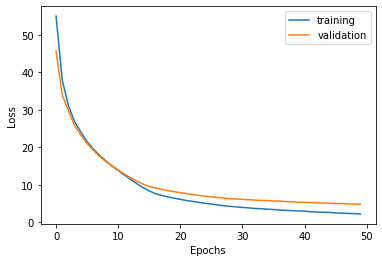

In [105]:
epochs = history.epoch
loss = history.history['loss']
validation_loss = history.history['val_loss']
plt.plot(epochs, loss, label='training')
plt.plot(epochs, validation_loss, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

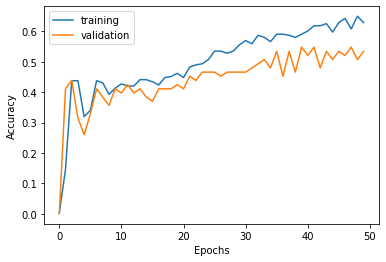

In [107]:
acc = history.history['sparse_categorical_accuracy']
validation_acc = history.history['val_sparse_categorical_accuracy']
plt.plot(epochs, acc, label='training')
plt.plot(epochs, validation_acc, label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [109]:
from tensorflow.keras import utils

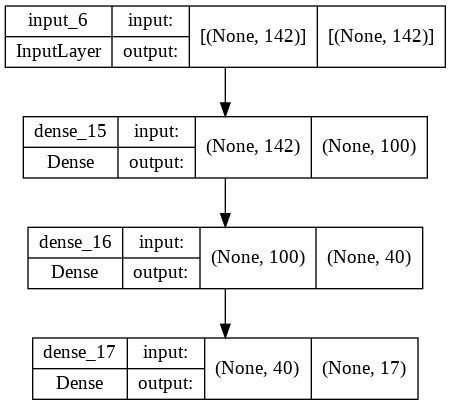

In [110]:
utils.plot_model(model, show_shapes=True)

In [111]:
test_scores = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 5.5652 - sparse_categorical_accuracy: 0.4286


# Poredjenje svih modela